In [20]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [21]:
StHomoCampaigns_4DynHomoResources = pd.read_csv('../Data/DynHomoCampaigns_4StHomoResources.csv')

In [22]:
StHomoCampaigns_4DynHomoResources = StHomoCampaigns_4DynHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4DynHomoResources_makespan_means = StHomoCampaigns_4DynHomoResources.mean()
StHomoCampaigns_4DynHomoResources_makespan_stds = StHomoCampaigns_4DynHomoResources.std()

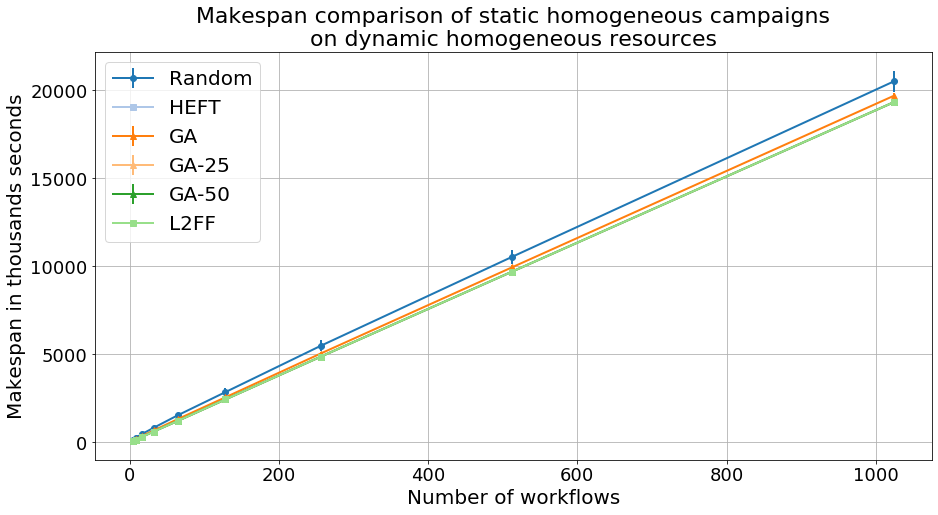

In [25]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non dynamic homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
fig.savefig('StHomoCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

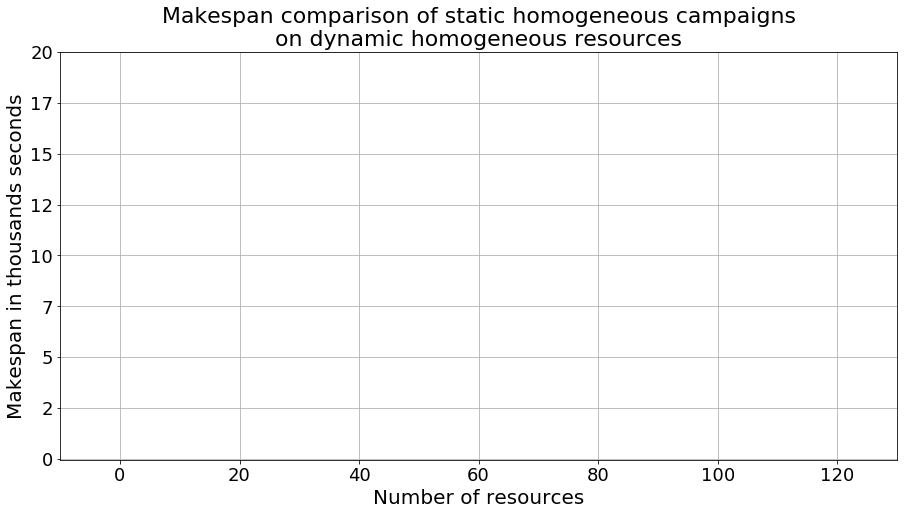

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non dynamic homogeneous resources', fontsize=22)
fig.savefig('DyHomoResources_StHomoCampaigns.pdf', bbox_inches='tight')

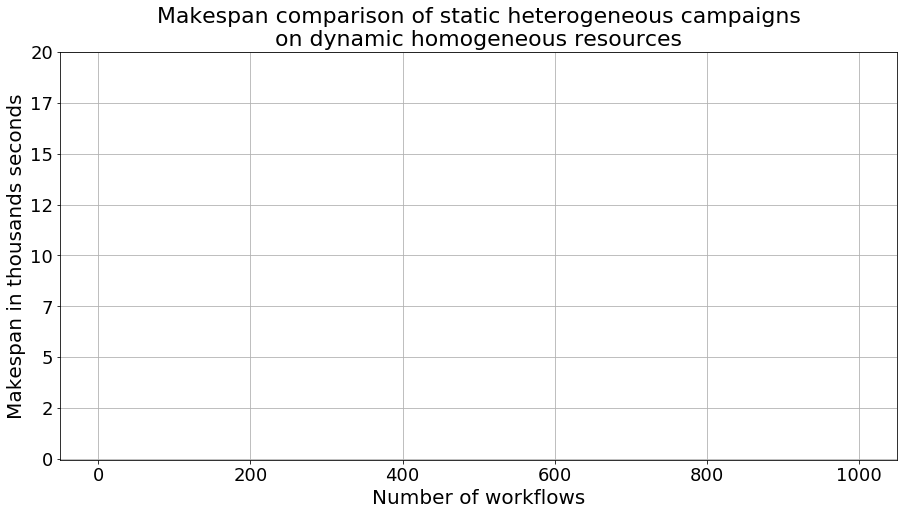

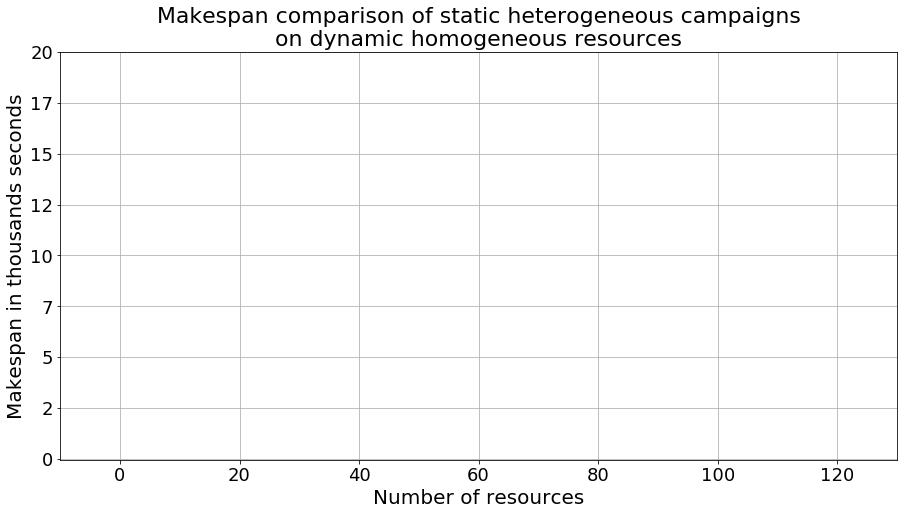

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
fig.savefig('StHeteroCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
fig.savefig('DyHomoResources_StHeteroCampaigns.pdf', bbox_inches='tight')

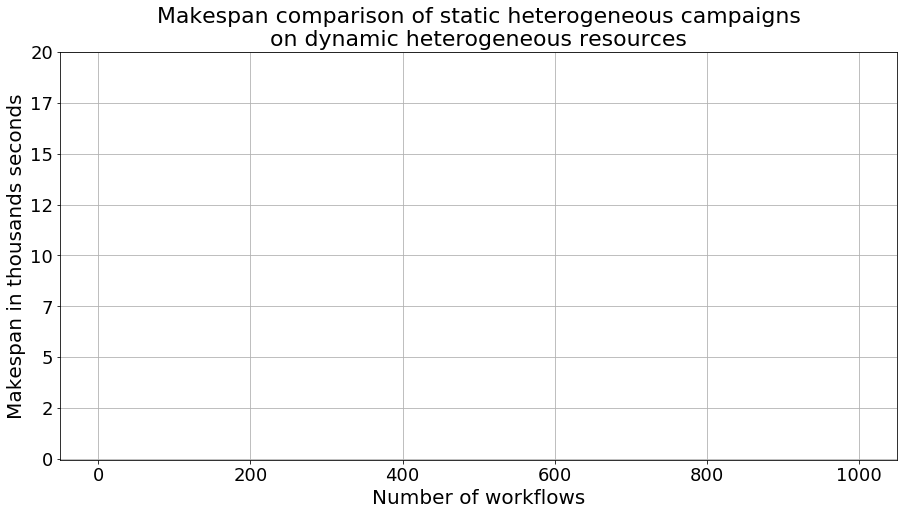

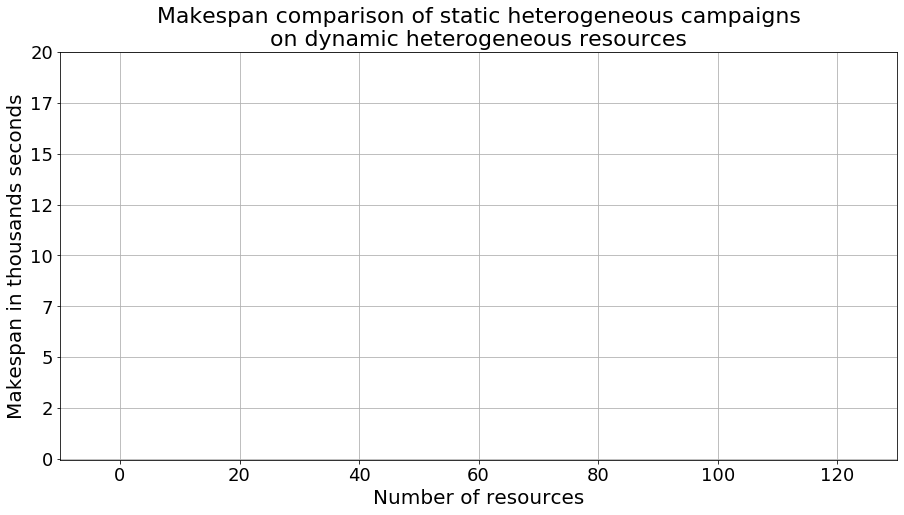

In [18]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
fig.savefig('StHeteroCampaigns_4DyHeteroResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
fig.savefig('DyHeteroResources_StHeteroCampaigns.pdf', bbox_inches='tight')